In [14]:
# from sklearn.datasets import make_multilabel_classification
from torch.utils.data import Dataset
import json
import numpy as np
import torch
import time
from tqdm import tqdm
from NN_Models import *

In [15]:
X_train = torch.load('data/X_year_venue_train.pt')
X_test = torch.load('data/X_year_venue_test.pt')
y_train = torch.load('data/y_train.pt')
y_test = torch.load('data/y_test.pt')

In [16]:
# train data loader
train_dataset, train_dataloader = BinaryDataLoader(X_train, y_train, shuffle=True, batch_size=100)

100%|██████████| 100/100 [10:27<00:00,  6.28s/it]


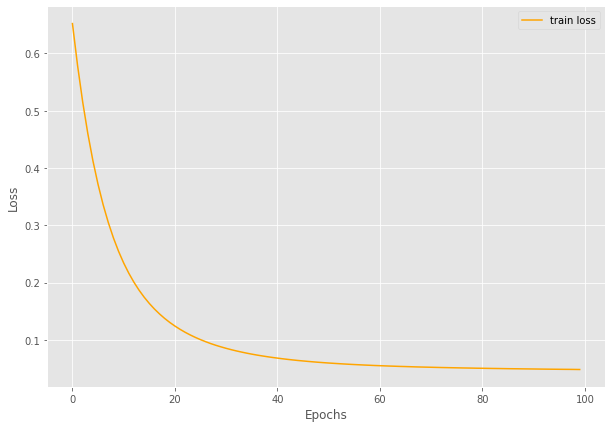

In [17]:
import torch.optim as optim
EMBEDDING = True
model = Model()
model.year_venue_model(embedding=EMBEDDING)

learning_rate = 0.001
optimizer = optim.Adam(params=model.year_venue_model(embedding=EMBEDDING).parameters(), lr=learning_rate) # 学习率衰减 / 学习率震荡
epochs = 100
model.train(train_dataloader, optimizer, epochs)
model.save_status("year_venue")
model.plot_loss()

### Test (ignore when submit kaggle)

In [19]:
from evaluation import evaluation

# print some info
print(f"[INFO]: Number of testing samples: {X_test.shape[0]}")
print(f"[INFO]: Number of testing features: {X_test.shape[1]}")

thresholds = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

f1_scores = evaluation(model.model, X_test, y_test, thresholds)

[INFO]: Number of testing samples: 3086
[INFO]: Number of testing features: 486


100%|██████████| 9/9 [01:24<00:00,  9.40s/it]


In [20]:
print(thresholds[f1_scores.index(max(f1_scores))])
print(max(f1_scores))

0.1
0.09287086258899986


#### 04/10/2022
- 0.3
- 0.08649579642027334

In [21]:
from preprocessing import for_kaggle
from evaluation import kaggle_predict

# X_kaggle = for_kaggle('year_venue')

kaggle_predict(model.model, X_train, 'year_venue_train')
kaggle_predict(model.model, X_test, 'year_venue_test')

100%|██████████| 3086/3086 [00:01<00:00, 1568.85it/s]


# Kaggle Predictions

In [13]:
from preprocessing import for_kaggle
from evaluation import kaggle_predict

X_kaggle = for_kaggle('year_venue')

kaggle_predict(model.model, X_kaggle, 'year_venue')

100%|██████████| 800/800 [00:00<00:00, 1545.80it/s]
